In [1]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [142]:
def linear_kernel(x, y):
    s = 0
    if len(x)!=len(y):
        print('2 objects should be have same length!')
    else:
        for i, xi in enumerate(x):
            s += xi*y[i]
    return s

def objective(alpha):
    # alpha is 1xn array or list
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    s = numpy.dot(alpha, numpy.dot(alpha, P))/2 - numpy.sum(alpha)
    return s

def zerofun(alpha):
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, targets)

def extract_nonzeros():
    return [inputs[(alpha>10**(-5))], 
            targets[(alpha>10**(-5))], 
            alpha[(alpha>10**(-5))]]

def find_b(index_sv):
    return numpy.dot([sv[2][i]*ti for i,ti in enumerate(sv[1])], 
                     [linear_kernel(sv[0][index_sv],xi) for xi in sv[0]]) - sv[1][index_sv]

def indicator(s):
    return numpy.dot([sv[2][i]*ti for i,ti in enumerate(sv[1])], [linear_kernel(s,xi) for xi in sv[0]]) - b

In [145]:
# Generate Test Data
numpy.random.seed(100)
classA = numpy.concatenate((numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5],
                           numpy.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = numpy.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = numpy.concatenate((classA, classB))
targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))



N = inputs.shape[0]

permute=list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

In [146]:
K = numpy.array([[linear_kernel(xi, xj) for xi in inputs] for xj in inputs])

P = numpy.outer(targets,targets)*K

ret = minimize(objective, numpy.zeros(N), bounds=[(0,None) for b in range(N)], 
               constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']

sv = extract_nonzeros()

isv = 0
b = find_b(isv)

print(indicator([1.5, -0.5]))

-2.8244581631344623


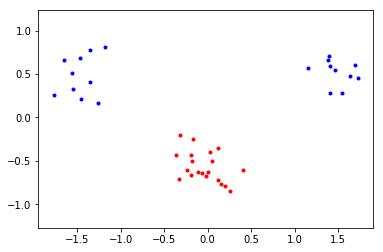

In [147]:
# Plotting
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

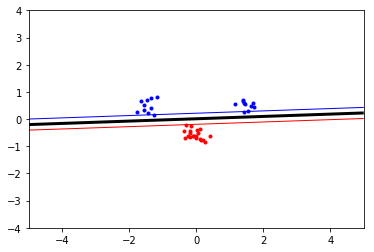

In [148]:
# Plotting the Decision Boundary
xgrid = numpy.linspace(-5, 5)
ygrid = numpy.linspace(-4, 4)

grid = numpy.array([[indicator([x, y]) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
plt.show()